In [1]:
from pennylane import numpy as np
import pennylane as qml
from pennylane import qchem
from matplotlib import pyplot as plt
from functions_vqe import vqe_uccsd, vqe_hee
from functions_vqe_th import optimize_vqe, VQEModule
import torch as th

device = 'cpu'

## He<sub>2</sub> hamiltonian definition 

In [2]:
dataset = qml.data.load('qchem', molname="He2")[0]
H, qubits = dataset.hamiltonian, len(dataset.hamiltonian.wires)
print("Number of qubits = ", qubits)
print("The Hamiltonian is ", H)

Number of qubits =  8
The Hamiltonian is  -1.6743100655776797 * I([0, 1, 2, 3, 4, 5, 6, 7]) + 0.3416412951109973 * Z(0) + 0.01523407338776362 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Y(4)) + 0.01523407338776362 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ X(4)) + 0.3416408311620236 * Z(2) + 0.025441159889832372 * (Z(0) @ Z(2)) + 0.015234388911867857 * (Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + 0.015234388911867857 * (X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + 7.317214998671384e-08 * (Z(0) @ Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + 7.317214998671384e-08 * (Z(0) @ X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + -0.5193693204313432 * Z(4) + 0.09152839641299164 * (Z(0) @ Z(4)) + -0.5193733761290926 * Z(6) + 0.0915284611478574 * (Z(0) @ Z(6)) + 0.34164129511099733 * Z(1) + 0.14108387203893755 * (Z(0) @ Z(1)) + 0.03956129782205163 * (Y(0) @ Z(2) @ Z(3) @ Y(4)) + 0.03956129782205163 * (X(0) @ Z(2) @ Z(3) @ X(4)) + 0.11564281616296 * (Y(0) @ X(1) @ X(2) @ Y(3)) + -0.11564281616296 * (Y(0) @ Y(1) @ X(2) @ X(3)) + -0.11564281616296 * (X(0) @ X(1) @

In [3]:
dev = qml.device("lightning.qubit", wires=qubits)

In [4]:
electrons = 4
hf_state = qml.qchem.hf_state(electrons, qubits)
singles, doubles = qchem.excitations(electrons, qubits)
print(hf_state)

[1 1 1 1 0 0 0 0]


In [5]:
s_wires, d_wires = qml.qchem.excitations_to_wires(singles, doubles)

In [6]:
max_iterations = 50
conv_tol = 1e-06

opt = qml.GradientDescentOptimizer(stepsize=0.1)

## Distribution of results

In [8]:
layers = np.arange(2, 16, 2)
mean_energies = []

for l in layers:
    print("Layers:", l)
    energies = []
    for run in range(10):
        opt = qml.AdamOptimizer(stepsize=0.1)
        energy, _, _, _ = vqe_hee(H, qubits, L=l, opt=opt, max_iterations=100, conv_tol=1e-06, verbose=False)
        energies.append(energy[-1])
    mean_energies.append(np.mean(energies))


Layers: 2
Layers: 4

Convergence achieved!
Layers: 6

Convergence achieved!
Layers: 8
Layers: 10
Layers: 12
Layers: 14


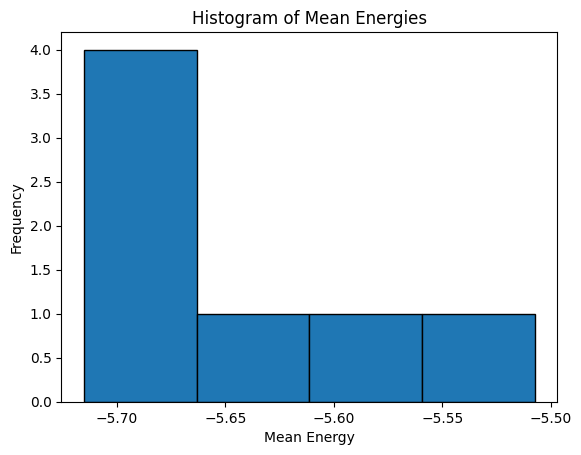

In [9]:
plt.hist(mean_energies, bins='auto', edgecolor='black')
plt.xlabel('Mean Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Energies')
plt.show()